In [1]:
import numpy as np
import pandas as pd
import pymc as pm
import bambi as bmb
import arviz as az

In [2]:
success = np.array([33.48, 42.53, 48.53, 30.21, 38.76, 38.59, 52.93, 32.65, 52.42, 22.22, 41.40, 16.28, 40.83, 24.43, 56.38])
IQ = np.array([112, 94, 118, 87, 96, 106, 71, 91, 95, 94, 100, 98, 94, 113, 85])
years_in_school = np.array([12, 14, 18, 10, 13, 22, 17, 15, 16, 9, 19, 8, 20, 11, 21])
grit = np.array([2.2, 3.2, 3.4, 1.8, 2.8, 0.2, 4.4, 1.0, 4.6, 0.4, 1.6, 0.0, 1.2, 0.6, 4.2])
data = pd.DataFrame({
    'Success': success,
    'IQ': IQ,
    'Years_in_School': years_in_school,
    'Grit': grit
})

## Pymc

In [3]:
with pm.Model() as lr_model_1:
    b_0 = pm.Normal('intercept', mu=0, tau=0.0001)
    b_1 = pm.Normal('years_in_school', mu=0, tau=0.0001)
    tau = pm.Gamma('success_tau', alpha=0.01, beta=0.01)

    mu = b_0 + b_1 * years_in_school
    obs = pm.Normal('observation', mu=mu, tau=tau, observed=success)
    step = pm.NUTS()
    trace1 = pm.sample(25000, step=step, tune=5000, chains=1, nuts_sampler="nutpie")

Progress,Draws,Divergences,Step Size,Gradients/Draw
,30000,0,0.53,3


In [4]:
az.summary(trace1)

arviz - WARNING - Shape validation failed: input_shape: (1, 25000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,7.648,7.688,-7.039,21.820,0.103,0.076,5643.0,6362.0,NaN
success_tau,0.016,0.006,0.005,0.028,0.000,0.000,12837.0,12644.0,NaN
success_tau_log__,-4.184,0.407,-4.932,-3.428,0.004,0.003,12837.0,12644.0,NaN
years_in_school,2.029,0.493,1.128,2.969,0.007,0.005,5766.0,6497.0,NaN


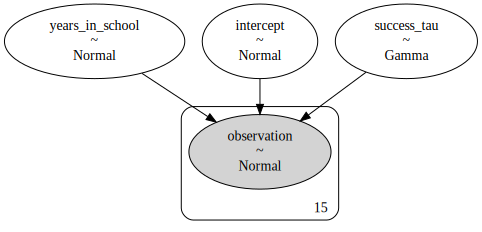

In [5]:
graphviz = pm.model_to_graphviz(lr_model_1)
graphviz

In [6]:
with lr_model_1:
    pm.compute_log_likelihood(trace1)

Output()

In [7]:
az.loo(trace1)

Computed from 25000 posterior samples and 15 observations log-likelihood matrix.

         Estimate       SE
elpd_loo   -54.31     2.30
p_loo        2.68        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       14   93.3%
 (0.5, 0.7]   (ok)          1    6.7%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [8]:
az.waic(trace1)

/home/hwting/anaconda3/envs/rapids/lib/python3.11/site-packages/arviz/stats/stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 25000 posterior samples and 15 observations log-likelihood matrix.

          Estimate       SE
elpd_waic   -54.12     2.18
p_waic        2.48        -

There has been a warning during the calculation. Please check the results.

In [9]:
with pm.Model() as lr_model_2:
    b_0 = pm.Normal('intercept', mu=0, tau=0.0001)
    b_1 = pm.Normal('grit', mu=0, tau=0.0001)
    tau = pm.Gamma('success_tau', alpha=0.01, beta=0.01)

    mu = b_0 + b_1 * grit
    obs = pm.Normal('observation', mu=mu, tau=tau, observed=success)
    step = pm.NUTS()
    trace2 = pm.sample(25000, step=step, tune=5000, chains=1, nuts_sampler="nutpie")

Progress,Draws,Divergences,Step Size,Gradients/Draw
,30000,0,0.71,7


In [10]:
az.summary(trace2)

arviz - WARNING - Shape validation failed: input_shape: (1, 25000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
grit,6.396,1.147,4.209,8.524,0.013,0.009,8028.0,10133.0,NaN
intercept,24.627,3.007,18.797,30.197,0.034,0.024,7929.0,9529.0,NaN
success_tau,0.026,0.010,0.008,0.045,0.000,0.000,11519.0,12358.0,NaN
success_tau_log__,-3.737,0.409,-4.501,-2.972,0.004,0.003,11519.0,12358.0,NaN


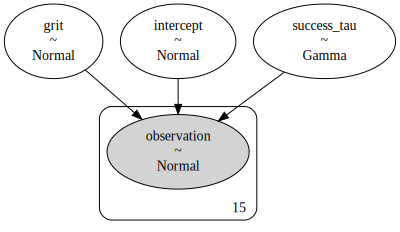

In [11]:
graphviz = pm.model_to_graphviz(lr_model_2)
graphviz

In [12]:
with lr_model_2:
    pm.compute_log_likelihood(trace2)

Output()

In [13]:
az.loo(trace2)

/home/hwting/anaconda3/envs/rapids/lib/python3.11/site-packages/arviz/stats/stats.py:789: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 25000 posterior samples and 15 observations log-likelihood matrix.

         Estimate       SE
elpd_loo   -51.09     2.83
p_loo        2.87        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       14   93.3%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         1    6.7%
   (1, Inf)   (very bad)    0    0.0%

In [14]:
az.waic(trace2)

/home/hwting/anaconda3/envs/rapids/lib/python3.11/site-packages/arviz/stats/stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 25000 posterior samples and 15 observations log-likelihood matrix.

          Estimate       SE
elpd_waic   -50.87     2.67
p_waic        2.64        -

There has been a warning during the calculation. Please check the results.

In [15]:
df_compare_loo = az.compare({"model1": trace1, "model2": trace2}, ic="loo")
df_compare_loo

/home/hwting/anaconda3/envs/rapids/lib/python3.11/site-packages/arviz/stats/stats.py:789: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model2,0,-51.092608,2.869989,0.000000,1.000000e+00,2.833467,0.000000,True,log
model1,1,-54.314821,2.680641,3.222213,4.440892e-16,2.303381,2.004624,False,log


In [16]:
df_compare_waic = az.compare({"model1": trace1, "model2": trace2}, ic="waic")
df_compare_waic

/home/hwting/anaconda3/envs/rapids/lib/python3.11/site-packages/arviz/stats/stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/home/hwting/anaconda3/envs/rapids/lib/python3.11/site-packages/arviz/stats/stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
model2,0,-50.865170,2.642552,0.000000,1.000000e+00,2.667853,0.000000,True,log
model1,1,-54.118425,2.484245,3.253255,1.332268e-15,2.183857,1.977936,True,log


## Bambi

In [17]:
model1 = bmb.Model('Success ~ Years_in_School', data=data)
results1 = model1.fit(draws=25000, tune=5000, chains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [Success_sigma, Intercept, Years_in_School]


Output()

Sampling 1 chain for 5_000 tune and 25_000 draw iterations (5_000 + 25_000 draws total) took 14 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


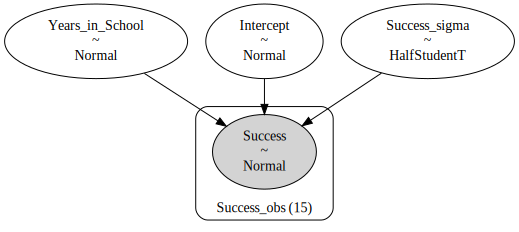

In [18]:
graphviz = pm.model_to_graphviz(model1.backend.model)
graphviz

In [19]:
az.summary(results1)

arviz - WARNING - Shape validation failed: input_shape: (1, 25000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,7.983,7.956,-7.250,22.697,0.053,0.043,22794.0,16269.0,NaN
Success_sigma,8.400,1.741,5.541,11.684,0.013,0.009,20005.0,15852.0,NaN
Years_in_School,2.009,0.510,1.020,2.940,0.003,0.002,22677.0,16208.0,NaN


In [20]:
model2 = bmb.Model('Success ~ Grit', data=data)
results2 = model2.fit(draws=25000, tune=5000, chains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [Success_sigma, Intercept, Grit]


Output()

Sampling 1 chain for 5_000 tune and 25_000 draw iterations (5_000 + 25_000 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


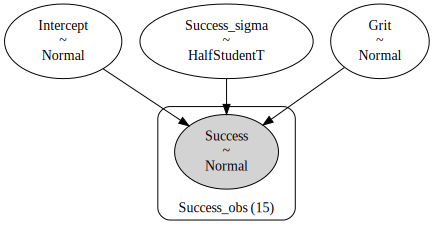

In [21]:
graphviz = pm.model_to_graphviz(model2.backend.model)
graphviz